In [4]:
import pandas as pd
import numpy as np

In [5]:
df_l1= pd.read_csv('/content/train_ta_l1.csv')
df_l1

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_1,NaN,NaN,0.0,0.0,0.0,0.0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_1,NaN,NaN,NaN,0.0,NaN,NaN
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_1,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_1,NaN,NaN,1.0,NaN,NaN,NaN
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_1,NaN,0.0,NaN,NaN,NaN,NaN
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_1,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
df_test = pd.read_csv('test_ta_l1.csv', engine='python')
df_test

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_1,NaN,NaN,0.0,0.0,NaN,0.0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_1,0.0,NaN,1.0,0.0,NaN,NaN
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_1,0.0,0.0,0.0,NaN,NaN,NaN
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_1,0.0,NaN,0.0,0.0,0.0,0.0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_1,1.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1130,😂😂😂 ஊம்பு,question_1,1.0,1.0,NaN,0.0,NaN,NaN
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",question_1,1.0,1.0,NaN,NaN,1.0,NaN
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,question_1,NaN,NaN,1.0,0.0,NaN,1.0
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,question_1,NaN,0.0,NaN,1.0,1.0,NaN


In [7]:
annotation_cols = ['ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5', 'ta_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie

In [8]:
# Apply to DataFrame
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6,label_1
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,question_1,NaN,NaN,0.0,0.0,0.0,0.0,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,question_1,NaN,NaN,NaN,0.0,NaN,NaN,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,question_1,1.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,question_1,NaN,NaN,1.0,NaN,NaN,NaN,1
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,question_1,NaN,0.0,NaN,NaN,NaN,NaN,0
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,question_1,NaN,0.0,NaN,NaN,NaN,NaN,0


In [9]:
# Apply to DataFrame
df_test['label_1'] = df_test[annotation_cols].apply(get_majority_label,axis=1)
df_test

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6,label_1
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_1,NaN,NaN,0.0,0.0,NaN,0.0,0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_1,0.0,NaN,1.0,0.0,NaN,NaN,0
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_1,0.0,0.0,0.0,NaN,NaN,NaN,0
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_1,0.0,NaN,0.0,0.0,0.0,0.0,0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_1,1.0,0.0,NaN,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1130,😂😂😂 ஊம்பு,question_1,1.0,1.0,NaN,0.0,NaN,NaN,1
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",question_1,1.0,1.0,NaN,NaN,1.0,NaN,1
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,question_1,NaN,NaN,1.0,0.0,NaN,1.0,1
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,question_1,NaN,0.0,NaN,1.0,1.0,NaN,1


In [10]:
# Combine directly assuming same text order
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

# Convert to int
df['label_1'] = df['label_1'].astype(int)


# Preview
print(df.head())
print(df.shape)
df

                                                text  label_1
0     *1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...        0
1     சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...        0
2           தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா        0
3      பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆        1
4    என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...        1
(6779, 2)


,text,label_1
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,1
...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,1
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...,0
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,0
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,0


In [11]:
# Combine directly assuming same text order
df2 = pd.DataFrame({
    'text': df_test['text'],
    'label_1': df_test['label_1'],

})

# Convert to int
df2['label_1'] = df2['label_1'].astype(int)


# Preview
print(df2.head())
print(df2.shape)
df2

                                                text  label_1
0     வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...        0
1  #4YrsOfValiantVIVEGAM  #Valimai #AjithKumar   ...        0
2  #AmbedkarBlueShirtRally  இந்த போராட்டத்துக்கு ...        0
3  #BREAKING | திருச்சி மாவட்டம்  மணப்பாறையை அடுத...        0
4  #Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...        0
(1135, 2)


,text,label_1
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,0
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,0
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,0
...,...,...
1130,😂😂😂 ஊம்பு,1
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",1
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,1
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,1


In [12]:
import re
def normalize_text(text):
    text = re.sub(r'<handle replaced>', '[USER]', text)       # Replace user handles
    text = re.sub(r'https?://\S+|www\.\S+', '', text)          # Remove URLs
    text = re.sub(r'<.*?>', '', text)                          # Remove any other HTML tags
    text = re.sub(r'\s+', ' ', text).strip()                   # Normalize whitespace
    return text

In [13]:
df['text'] = df['text'].apply(normalize_text)
df

,text,label_1
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நி...,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு...,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ஒவ...,1
...,...,...
6774,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭,1
6775,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமைனு...,0
6776,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...,0
6777,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...,0


In [14]:
df2['text'] = df2['text'].apply(normalize_text)
df2

,text,label_1
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துறையி...,0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ஏண்...,0
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு வ...,0
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத்...,0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா [USER],0
...,...,...
1130,😂😂😂 ஊம்பு,1
1131,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",1
1132,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,1
1133,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,1


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch [1/5] | Train Loss: 0.6745 | Val Loss: 0.6683 | Weighted F1: 0.3616 | Macro F1: 0.3443
Epoch [2/5] | Train Loss: 0.5836 | Val Loss: 0.5510 | Weighted F1: 0.7484 | Macro F1: 0.7466
Epoch [3/5] | Train Loss: 0.4965 | Val Loss: 0.4880 | Weighted F1: 0.7748 | Macro F1: 0.7733
Epoch [4/5] | Train Loss: 0.4433 | Val Loss: 0.4571 | Weighted F1: 0.7948 | Macro F1: 0.7946
Epoch [5/5] | Train Loss: 0.3966 | Val Loss: 0.5141 | Weighted F1: 0.7693 | Macro F1: 0.7677
Final Test Loss: 0.5141
Final Test Weighted F1 Score: 0.7693
Final Test Macro F1 Score: 0.7677


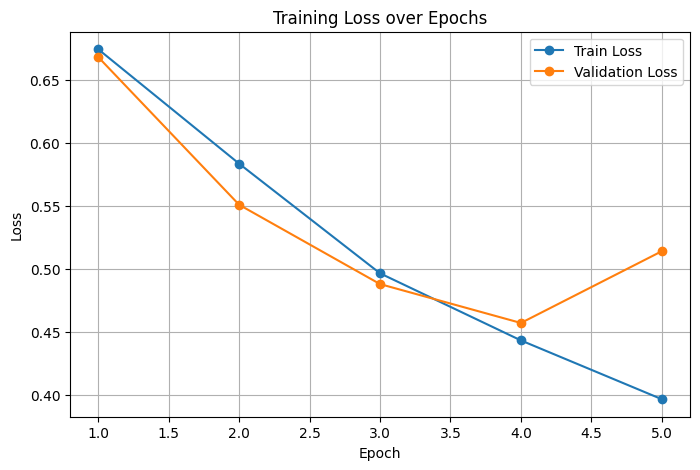

In [30]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
import numpy as np
from sklearn.metrics import f1_score
from torch.optim import Adam
import torch.nn as nn
import matplotlib.pyplot as plt

########################################################################
# 1. Custom PyTorch Dataset
########################################################################
class GenderAbuseDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

########################################################################
# 2. Training Function
########################################################################
def train_one_epoch(model, data_loader,optimizer, device,criterion):
    model.train()
    total_loss = 0

    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

########################################################################
# 3. Evaluation Function
########################################################################
def evaluate(model, data_loader, device,criterion):
    model.eval()
    preds = []
    true_labels = []
    total_loss = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            total_loss += outputs.loss.item()

            # Predicted class is the one with the highest score
            predicted_class = torch.argmax(logits, dim=-1)
            preds.extend(predicted_class.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Compute weighted F1 score
    avg_loss = total_loss / len(data_loader)

    f1 = f1_score(true_labels, preds, average='weighted')
    macro_f1 = f1_score(true_labels, preds, average='macro')

    return avg_loss,f1,macro_f1

########################################################################
# 4. Main Script
########################################################################
def main():




    # -------------------------------
    # B) Initialize Tokenizer
    # -------------------------------
    model_name = "ai4bharat/indic-bert"
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # -------------------------------
    # C) Create PyTorch Datasets
    # -------------------------------
    train_dataset = GenderAbuseDataset(
        texts=df['text'].values,
        labels=df['label_1'].values,
        tokenizer=tokenizer,
        max_len=128
    )

    test_dataset = GenderAbuseDataset(
        texts=df2['text'].values,
        labels=df2['label_1'].values,
        tokenizer=tokenizer,
        max_len=128
    )

    # -------------------------------
    # D) Create DataLoaders
    # -------------------------------
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # -------------------------------
    # E) Initialize Model
    # -------------------------------
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
    model.to(device)

    # -------------------------------
    # F) Optimizer

    # -------------------------------
    optimizer = AdamW(model.parameters(), lr=0.00001)
    criterion = nn.CrossEntropyLoss()


    # -------------------------------
    # G) Training Loop
    # -------------------------------
    epochs = 5 # Adjust based on data size\
    train_losses = []
    val_losses = []
    macro_f1_scores = []

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader,optimizer, device,criterion)
        train_losses.append(train_loss)
        val_loss, weighted_f1, macro_f1 = evaluate(model, test_loader, device, criterion)
        val_losses.append(val_loss)
        # val_f1,macro_f1 = evaluate(model, test_loader, device)
        macro_f1_scores.append(macro_f1)
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Weighted F1: {weighted_f1:.4f} | Macro F1: {macro_f1:.4f}")

    # -------------------------------
    # H) Final Evaluation
    # -------------------------------
    final_val_loss, final_weighted_f1, final_macro_f1 = evaluate(model, test_loader, device, criterion)
    print(f"Final Test Loss: {final_val_loss:.4f}")
    print(f"Final Test Weighted F1 Score: {final_weighted_f1:.4f}")
    print(f"Final Test Macro F1 Score: {final_macro_f1:.4f}")


    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs+1), train_losses, marker='o', label="Train Loss")
    plt.plot(range(1, epochs+1), val_losses, marker='o', label="Validation Loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()
